# Training a sentiment classifier

In [1]:
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()

dataset = pd.read_csv('data/Sentiment Analysis Dataset.csv',error_bad_lines=False)
del dataset["ItemID"]
del dataset['SentimentSource']

elapsed_time = time.time() - start_time
print elapsed_time

print dataset.shape
print len(dataset)
dataset.head()



Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



1.73944497108
(1578612, 2)
1578612


,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [2]:
#dataset[:10].iterrows()

test_train = pd.DataFrame()

test_train = dataset
test_train.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


# preproccessing

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import HTMLParser # In Python 3.4+ import html 
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

def Clean(unescaped_tweet):
    '''This function takes a tweet as input and returns a tokenizing list.'''
    
    tokenizer = RegexpTokenizer(r'\w+')
    
    #tokenize words
    cleaned_tweet_tokens = tokenizer.tokenize(unescaped_tweet.lower())
    #remove stop words
    #cleaned_tweet_tokens = [word for word in cleaned_tweet_tokens if word not in stopwords.words('english')]
    
    #cleaned_tweet_tokens = [ ps.stem(w) for w in  cleaned_tweet_tokens]
    
    return cleaned_tweet_tokens

In [4]:


# start_time = time.time()
# test_train['token'] = test_train['SentimentText'].apply(lambda tweet: Clean(tweet))
# test_train.head()

# elapsed_time = time.time() - start_time
# print elapsed_time

In [5]:
test_train.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
import nltk

stemmer = SnowballStemmer('english')
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

vect = TfidfVectorizer(analyzer=stemmed_words, 
                       tokenizer=nltk.tokenize.casual.TweetTokenizer,
                       stop_words='english',
                       #min_df = 0.001, #dont include words that appear in less than x% of tweets
                       #max_df = 0.1
                      )

#test stemmer
#print(vect.fit_transform(sm_set.head()[:10]))
#print(vect.get_feature_names())

In [6]:
from sklearn.utils import shuffle

In [11]:
#keep only a sample
sm_set = pd.DataFrame(shuffle(test_train)[:100000]).reset_index(drop=True)

In [12]:
sm_set.SentimentText.head()

0                 @hannysimon I'm coming home today!! 
1    gnite tworld! may you sleep well. i dont think...
2              @NateSchwab that's the thing she can't 
3    and I want to see Drag Me To Hell again sooo b...
4    @Maineeventmnp AWWW tht sucks... where's my cu...
Name: SentimentText, dtype: object

In [14]:
# based on the text of each tweet, create a (sparse) matrix containing the occurencies of each word and store it into X.
# this is going to be our feature matrix, which we will give into the classifier to "learn" the sentiment.

#narrow down the dataset
sm_set = test_train#[:100000]

start_time = time.time()
#fit_transform is a method to create the feature matrix of the tweets based on word occurencies
X = vect.fit_transform(sm_set.SentimentText)
y = sm_set.Sentiment

elapsed_time = time.time() - start_time
print elapsed_time,'sec to fit transform',len(sm_set),'samples'

255.079085827 sec to fit transform 1578612 samples


In [15]:
print len(vect.get_feature_names())
print vect.get_feature_names()

636007


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#split the dataset in a training (X_train, y_train) and test dataset (X_test,y_test)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


# train NaiveBayes without feature selection

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
#train the classifier
start_time = time.time()
clf = MultinomialNB()
clf.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print elapsed_time

0.265272855759


In [20]:
print vect.get_feature_names()[::len(vect.get_feature_names())/40]

[u'00', u'3p9pkr', u'6p3im', u'abail', u'amaneci', u'assistiu', u'benjaminblack', u'brendensteven', u'cathyrigbi', u'clickio', u'd_ryura', u'didntwork', u'ebert', u'explosivosr', u'friendstack', u'gotki', u'hesgettingamazingreview', u'ilube', u'jaybaer', u'jorgemudri', u'kennyl98', u'lall', u'lmmeng', u'manu', u'michaeal', u'moviesss', u'nenna', u'ohscreditunion', u'pentagramdream', u'pshawww', u'renna', u'sakura0_o', u'shaunswagg', u'someh', u'sumchi', u'thanickyj', u'tootexti', u'unvibr', u'wepppaaaaaaaaaaaaaaa', u'xseifer', u'\u02c6\xec\u0153\xbc\xeb']


In [21]:
len(vect.get_feature_names())

636007

In [22]:
vect

TfidfVectorizer(analyzer=<function stemmed_words at 0x7fe09dfdc9b0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm=u'l2',
        preprocessor=None, smooth_idf=True, stop_words='english',
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<class nltk.tokenize.casual.TweetTokenizer at 0x7fe09e4d4870>,
        use_idf=True, vocabulary=None)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print "Results for %i training samples and %i test samples (trained on %f sec)" %(len(y_train),len(y_test),elapsed_time)
print classification_report(y_test,clf.predict(X_test))


Results for 1057670 training samples and 520942 test samples (trained on 0.265273 sec)
             precision    recall  f1-score   support

          0       0.74      0.82      0.78    260447
          1       0.80      0.72      0.75    260495

avg / total       0.77      0.77      0.77    520942



# feature selection

By now, vect has a vocabulary including all words and we will trim that using a statistical method, such as chi2

In [25]:
from sklearn.feature_selection import chi2,f_classif,SelectPercentile

In [26]:
import matplotlib.pyplot as plt

In [27]:
y_train_bool = map(lambda x: x==1,y_train)

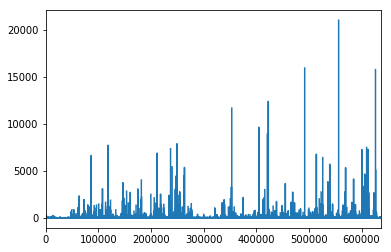

In [28]:
pd.Series(f_classif(X_train,y_train_bool)[0]).plot()
plt.show()

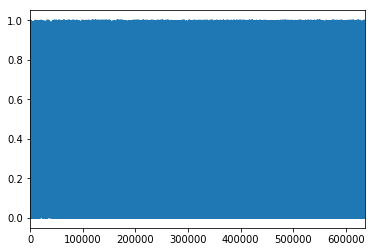

In [29]:
pd.Series(f_classif(X_train,y_train_bool)[1]).plot()
plt.show()

In [30]:
selector = SelectPercentile(chi2, percentile=1)

In [31]:
selector.fit(X_train,y_train)

SelectPercentile(percentile=1, score_func=<function chi2 at 0x7fe09f0cc8c0>)

In [32]:
clf.fit(selector.transform(X_train),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
#predict
results = clf.predict(selector.transform(X_test))
print classification_report(y_test,results)


             precision    recall  f1-score   support

          0       0.77      0.77      0.77    260447
          1       0.77      0.77      0.77    260495

avg / total       0.77      0.77      0.77    520942



# try different models

** Logistic Regression **

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression('l2')

In [ ]:
# fit a variable selector in our data
selector = SelectPercentile(chi2, percentile=10)
selector.fit(X_train,y_train)

In [ ]:
#fit the model
clf.fit(selector.transform(X_train),y_train)

In [ ]:
#predict
results = clf.predict(selector.transform(X_test))
print classification_report(y_test,results)

# Sentiment analysis in some sample sentences

In [ ]:
sample_text = ['Aris is a bit dubtful about me being a smart ass',
               'aris doesnt love sklearn yet',
               'but he will definitely love it soon',
               'fuck','bad','amazing', 'this is a sentence',
               'this is a bad sentence',]

In [ ]:
vect.transform(sample_text)

In [ ]:
for i,sent in enumerate(sample_text):
    print sent,clf.predict(vect.transform(sample_text))[i]

# export our model

In [405]:
time.localtime()[1:5]

(9, 25, 11, 30)

In [278]:
#save the clf classifier in a file to load it in a different notebook/at a different time
timestr = "%i-%i_%i,%i"%time.localtime()[1:5]
from sklearn.externals import joblib
joblib.dump(clf, 'trained models/'+'descr'+timestr+'.pkl') 
joblib.dump(vect, 'trained models/vect'+'descr'+timestr+'.pkl') 

#load it later with:
#clf = joblib.load('NaiveBayesCl_67k_tweets.pkl') 

In [ ]:
import pickle
s = pickle.dumps(vect)
vec2 = pickle.loads(s)
